In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('covid.csv')
df.head(3)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2


In [5]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [6]:
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

In [7]:
df.shape

(566602, 23)

In [8]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [9]:
pd.unique(df['sex'])

array([2, 1])

In [10]:
pd.unique(df['patient_type'])

array([1, 2])

In [11]:
len(pd.unique(df['entry_date']))

181

In [12]:
len(pd.unique(df['date_symptoms']))

181

In [13]:
pd.unique(df['intubed'])


array([97,  2,  1, 99])

In [14]:
pd.unique(df['pneumonia'])


array([ 2,  1, 99])

In [15]:
pd.unique(df['diabetes'])


array([ 2,  1, 98])

In [16]:
pd.unique(df['copd'])


array([ 2,  1, 98])

In [17]:
pd.unique(df['asthma'])


array([ 2,  1, 98])

In [18]:
pd.unique(df['inmsupr'])


array([ 2,  1, 98])

In [19]:
pd.unique(df['hypertension'])


array([ 2,  1, 98])

In [20]:
 pd.unique(df['other_disease'])


array([ 2,  1, 98])

In [21]:
pd.unique(df['cardiovascular'])


array([ 2,  1, 98])

In [22]:
pd.unique(df['obesity'])


array([ 2,  1, 98])

In [23]:
pd.unique(df['renal_chronic'])


array([ 2,  1, 98])

In [24]:
pd.unique(df['tobacco'])


array([ 2,  1, 98])

In [25]:
pd.unique(df['contact_other_covid'])


array([ 2, 99,  1])

In [26]:
pd.unique(df['covid_res'])


array([1, 2, 3])

In [27]:
pd.unique(df['icu'])


array([97,  2,  1, 99])

In [28]:
columns = [
    'intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu'
]
new_column= df[columns].replace([97,98,99],4)#4 is nan values
df2=df.drop(columns,axis=1)
df2[columns] = (new_column)

In [29]:
df2.drop(df2[df2['icu']==4].index,inplace=True)

In [30]:
df2.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,age,covid_res,intubed,pneumonia,...,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,54,1,2,2,...,2,2,2,2,2,1,2,2,4,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,30,1,2,1,...,2,2,2,2,2,2,2,2,4,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,60,1,2,2,...,2,2,1,2,1,2,2,2,4,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,47,1,2,1,...,2,2,2,2,2,2,2,2,4,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,63,1,2,2,...,2,2,1,2,2,2,2,2,4,2


In [31]:
df2.shape

(121788, 23)

In [32]:
df2.drop(['patient_type'],axis=1,inplace=True)


In [33]:
df2.drop(['pregnancy'],axis=1,inplace=True)
df2.drop(['contact_other_covid'],axis=1,inplace=True)

In [34]:
df2.drop(columns=['id','date_died','entry_date','date_symptoms'],axis=1,inplace=True)

In [35]:
def clean(df2):
    na_columns= [
    'intubed','pneumonia','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','icu'
]
    for col in na_columns:
        df2.drop(df2[df2[col]==4].index,inplace=True)
    return df2

In [36]:
clean(df2)

,sex,age,covid_res,intubed,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
2,1,54,1,2,2,2,2,2,2,2,2,2,1,2,2,2
3,2,30,1,2,1,2,2,2,2,2,2,2,2,2,2,2
4,1,60,1,2,2,1,2,2,2,1,2,1,2,2,2,2
5,2,47,1,2,1,1,2,2,2,2,2,2,2,2,2,1
6,2,63,1,2,2,2,2,2,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566584,2,45,3,2,1,2,2,2,2,2,2,2,2,2,2,2
566590,2,68,3,1,1,2,2,2,2,1,2,2,1,2,2,1
566591,2,48,3,1,1,1,2,2,2,1,2,2,2,2,2,1
566593,1,31,3,2,1,2,2,2,2,2,2,2,2,2,2,2


In [37]:
pd.unique(df2['intubed'])


array([2, 1])

In [38]:
df2

,sex,age,covid_res,intubed,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
2,1,54,1,2,2,2,2,2,2,2,2,2,1,2,2,2
3,2,30,1,2,1,2,2,2,2,2,2,2,2,2,2,2
4,1,60,1,2,2,1,2,2,2,1,2,1,2,2,2,2
5,2,47,1,2,1,1,2,2,2,2,2,2,2,2,2,1
6,2,63,1,2,2,2,2,2,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566584,2,45,3,2,1,2,2,2,2,2,2,2,2,2,2,2
566590,2,68,3,1,1,2,2,2,2,1,2,2,1,2,2,1
566591,2,48,3,1,1,1,2,2,2,1,2,2,2,2,2,1
566593,1,31,3,2,1,2,2,2,2,2,2,2,2,2,2,2


In [39]:
#Exploratory Data Analysis

In [40]:
#total count of icu patient 
df2['icu'].value_counts()

2    110340
1      9842
Name: icu, dtype: int64

In [41]:
df2.corr()

,sex,age,covid_res,intubed,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
sex,1.000000,0.010579,-0.047761,-0.032966,-0.052870,0.042993,0.023588,0.053298,0.027058,0.063589,0.035164,0.012545,0.049795,0.010521,-0.120674,-0.026090
age,0.010579,1.000000,-0.088900,-0.017332,-0.130882,-0.255214,-0.181965,0.028763,0.059289,-0.350186,0.030301,-0.124887,-0.025951,-0.057550,-0.058721,0.033900
covid_res,-0.047761,-0.088900,1.000000,0.054866,0.128282,0.030866,-0.026710,-0.011314,-0.050349,0.019058,-0.048855,-0.031508,0.068231,-0.033380,-0.009910,0.010755
intubed,-0.032966,-0.017332,0.054866,1.000000,0.189399,0.026444,-0.004433,-0.011787,-0.001511,0.014123,-0.008282,0.011632,0.039386,-0.001468,0.003223,0.456166
pneumonia,-0.052870,-0.130882,0.128282,0.189399,1.000000,0.070554,0.011818,-0.016687,-0.010508,0.053724,-0.036537,0.011623,0.066337,-0.001785,0.019020,0.137461
diabetes,0.042993,-0.255214,0.030866,0.026444,0.070554,1.000000,0.066879,0.000422,0.008492,0.358908,-0.009099,0.088354,0.084670,0.169500,0.025275,0.007374
copd,0.023588,-0.181965,-0.026710,-0.004433,0.011818,0.066879,1.000000,0.047315,0.038017,0.103923,0.025885,0.113045,0.024454,0.045323,0.126126,-0.009606
asthma,0.053298,0.028763,-0.011314,-0.011787,-0.016687,0.000422,0.047315,1.000000,0.018558,0.016274,0.005655,0.018181,0.046536,-0.005860,0.008458,-0.002027
inmsupr,0.027058,0.059289,-0.050349,-0.001511,-0.010508,0.008492,0.038017,0.018558,1.000000,0.000510,0.160343,0.053328,-0.008242,0.104382,0.013930,0.011335
hypertension,0.063589,-0.350186,0.019058,0.014123,0.053724,0.358908,0.103923,0.016274,0.000510,1.000000,0.019669,0.169095,0.131682,0.212671,0.031838,-0.005245


In [42]:
df2['diabetes'].value_counts()


2    85069
1    35113
Name: diabetes, dtype: int64

Text(0, 0.5, 'Count')

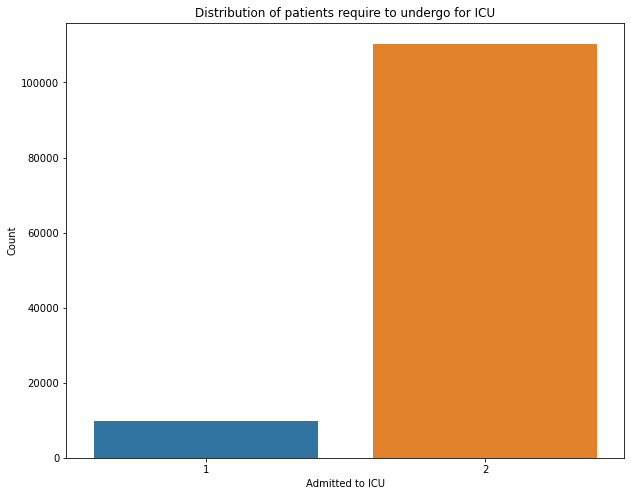

In [43]:

#count plot to check distribution of ICU patient
plt.figure(figsize=(10,8))
sns.countplot(x='icu',data=df2)
plt.title('Distribution of patients require to undergo for ICU')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
#plt.xticks([0,1],['Yes','No'])


In [44]:
df2['covid_res'].value_counts()#

1    67300
2    38659
3    14223
Name: covid_res, dtype: int64

([<matplotlib.axis.XTick at 0x7f80591494c0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

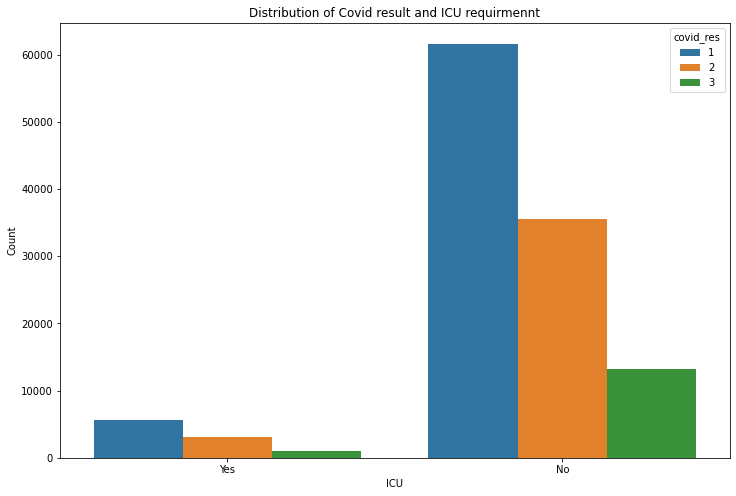

In [45]:
#To check distribution of   Covid result and ICU requirmennt
#cThe result of the test. (Positive - 1, Negative - 2, Awaiting Results - 3)
plt.figure(figsize=(12,8))
plot=sns.countplot(x='icu',hue='covid_res',data=df2)
plt.title('Distribution of Covid result and ICU requirmennt')
plt.xlabel('ICU')#1-yes 2-No
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])

In [46]:
df2['pneumonia'].value_counts()#

1    72509
2    47673
Name: pneumonia, dtype: int64

([<matplotlib.axis.XTick at 0x7f805abd9280>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

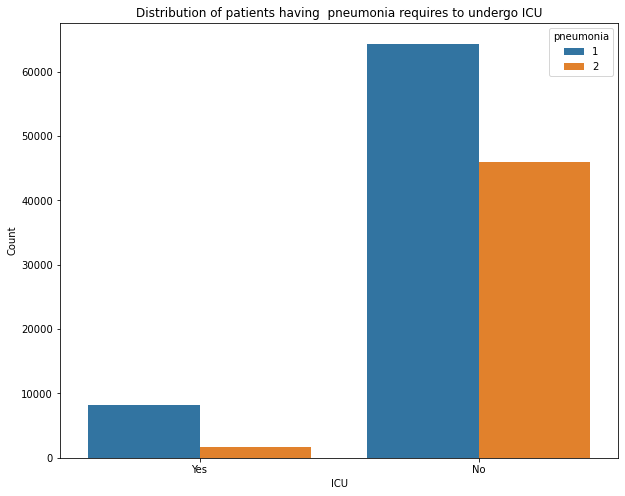

In [47]:
#count plot to check distribution of ICU patient
#count plot to check distribution of ICU patient having pneumonia
plt.figure(figsize=(10,8))
sns.countplot(x='icu',hue='pneumonia',data=df2)
plt.title('Distribution of patients having  pneumonia requires to undergo ICU')
plt.xlabel('ICU')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])

In [48]:
#This graph shows that the pneumonia patients have slightly higher chance of being admitted to ICU.

In [49]:
 pneumonia. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

SyntaxError: invalid syntax (<ipython-input-49-bdcf5a484dbe>, line 1)

([<matplotlib.axis.XTick at 0x7f805aa82940>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

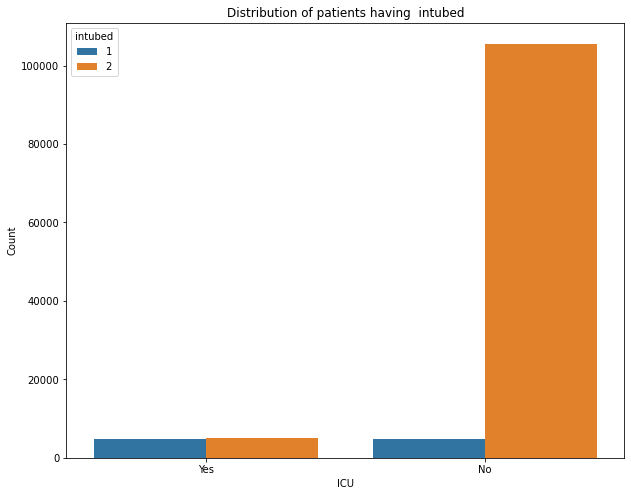

In [50]:
#count plot to check distribution of ICU patient having intubed
plt.figure(figsize=(10,8))
sns.countplot(x='icu',hue='intubed',data=df2)
plt.title('Distribution of patients having  intubed')
plt.xlabel('ICU')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])

In [51]:

#Identifies if the patient required intubation. (Yes - 1, No - 2)
#Alomost all the intubated positive patients are admitted to ICU.

([<matplotlib.axis.XTick at 0x7f8059387b80>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

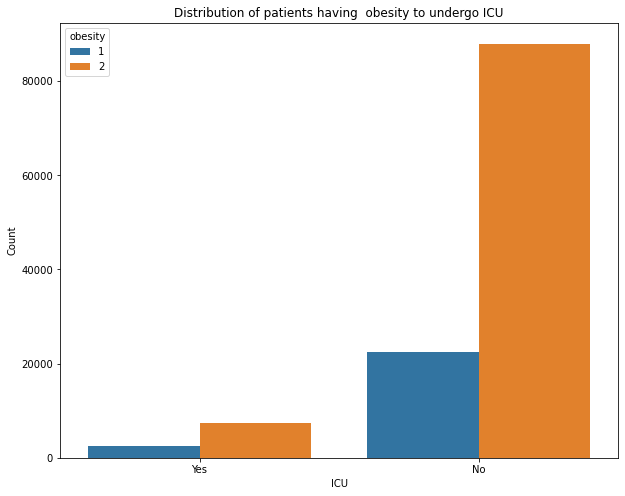

In [52]:
#count plot to check distribution of ICU patient having obesity
plt.figure(figsize=(10,8))
sns.countplot(x='icu',hue='obesity',data=df2)
plt.title('Distribution of patients having  obesity to undergo ICU')
plt.xlabel('ICU')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])

In [53]:
#Identifies if the patient is diagnosed with obesity. (Yes - 1, No - 2)
#Obese patients have slightly higher chance of being admitted to ICU.

([<matplotlib.axis.XTick at 0x7f8058c9b7f0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

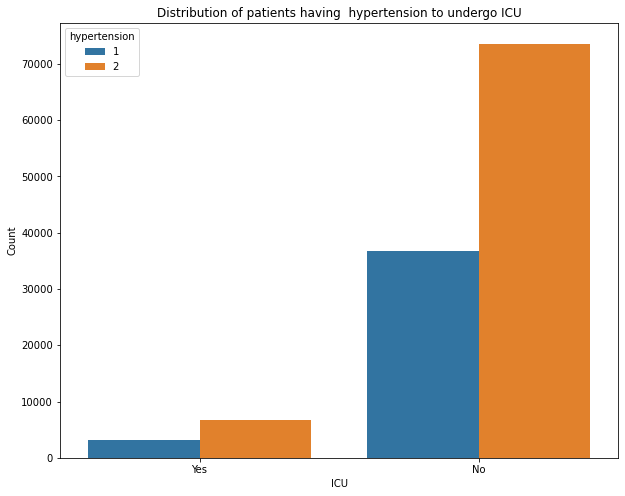

In [54]:
#count plot to check distribution of ICU patient having hypertension
plt.figure(figsize=(10,8))
sns.countplot(x='icu',hue='hypertension',data=df2)
plt.title('Distribution of patients having  hypertension to undergo ICU')
plt.xlabel('ICU')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])

In [55]:
#if the patient has a diagnosis of hypertension. Yes - 1, No -2
#hypertennsion  patients have lower chances of being admitted to ICU.

([<matplotlib.axis.XTick at 0x7f808ebb99d0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

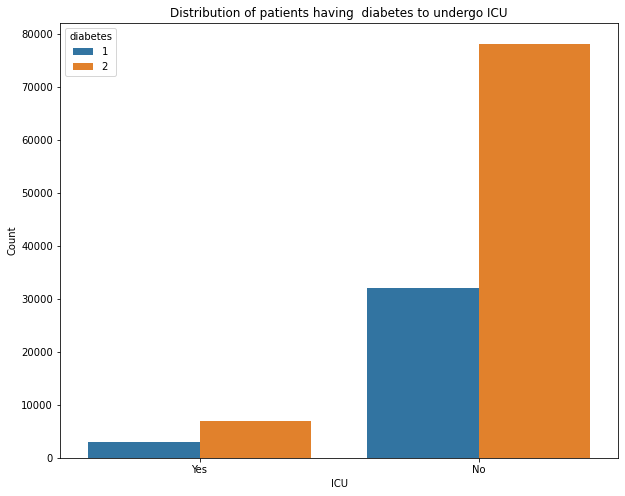

In [56]:
#count plot to check distribution of ICU patient having diabetes
plt.figure(figsize=(10,8))
sns.countplot(x='icu',hue='diabetes',data=df2)
plt.title('Distribution of patients having  diabetes to undergo ICU')
plt.xlabel('ICU')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])

In [57]:
#if the patient has a diagnosis of diabetes. (Yes - 1, No - 2)
#It shows that the patients having diabetes chances of being admitted to ICU is high compare to the non diabetes
#patients

<AxesSubplot:>

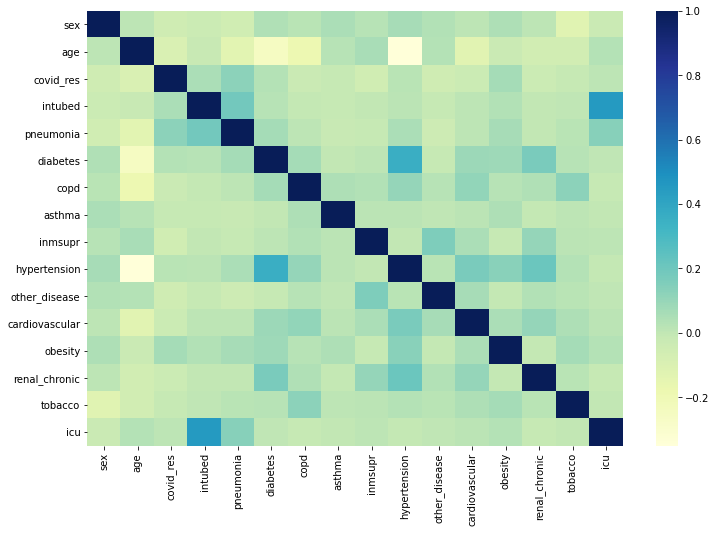

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),cmap="YlGnBu")


In [59]:
#Model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df2,test_size = 0.2,random_state = 123)

In [62]:
x_train,y_train = train.drop('icu',axis = 1),train['icu']
x_test,y_test = test.drop('icu',axis = 1),test['icu']

In [63]:
models = { 
 'log' :{ 
     'model' : LogisticRegression(), 
     'params' : {'C':np.logspace(0,4,10), 'class_weight':[None,'balanced']}
 }, 
 'dtc' :{ 
     'model' : DecisionTreeClassifier(), 
     'params' : {'max_depth':[5,6,7,8,9], 'criterion':['gini','entropy'], 'ccp_alpha':[0.1,0.01,1,2],
             'min_samples_leaf':[2,3,4,5]} 
 }, 
 'rfc' :{ 
     'model' : RandomForestClassifier(), 
     'params' : {'max_depth':[3,5,7,9], 'n_estimators':[50,100,150,200], 'class_weight':[None,'balanced'],
             'criterion':['gini','entropy']} 
 }, 
 'adaboost' :{ 
     'model' : AdaBoostClassifier(), 
     'params' : {'n_estimators':[50,100,150,200], 'learning_rate':[0.1,0.01,1,2]}  
 }, 
 'xgboost' :{ 
     'model' : xgb.XGBClassifier(), 
     'params' : {'n_estimators':[50,100,150,200], 'max_depth':[2,5,7,9]}  } 
} 


In [64]:
scores = [] 
for model_name, model in models.items(): 
    print(model_name) 
    grid_model = GridSearchCV(estimator = model['model'], param_grid = model['params'],scoring='recall',cv=5)  
    grid_model.fit(x_train,y_train) 
    scores.append({ 
         'model':model_name, 
         'best_param':grid_model.best_params_, 
         'best_score':grid_model.best_score_ 
 })


log
dtc
rfc
adaboost
xgboost
[13:30:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:30:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logisti

[13:32:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:32:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[13:34:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:34:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[13:37:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:37:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [66]:
pd.DataFrame(scores)

,model,best_param,best_score
0,log,"{'C': 166.81005372000593, 'class_weight': 'bal...",0.538060
1,dtc,"{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_...",0.497054
2,rfc,"{'class_weight': 'balanced', 'criterion': 'ent...",0.534727
3,adaboost,"{'learning_rate': 0.01, 'n_estimators': 50}",0.497054
4,xgboost,"{'max_depth': 5, 'n_estimators': 100}",0.281522


In [ ]:
#Random Forest ClAssifier Model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [68]:
from sklearn.utils import class_weight

In [69]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [70]:
class_weights

array([6.15998206, 0.54416975])

In [71]:
class_weight=dict({1:6.15998206,2:0.54416975})


In [72]:
clf = RandomForestClassifier(n_estimators=200,max_depth =9,class_weight= class_weight,n_jobs=-1)
clf.fit(x_train,y_train)
y_predict_train = clf.predict(x_train)
y_predict_test = clf.predict(x_test)
print('Train: ')
print(metrics.classification_report(y_train,y_predict_train))
print('Test: ')
print(metrics.classification_report(y_test,y_predict_test))



Train: 
              precision    recall  f1-score   support

           1       0.47      0.54      0.50      7804
           2       0.96      0.95      0.95     88341

    accuracy                           0.91     96145
   macro avg       0.72      0.74      0.73     96145
weighted avg       0.92      0.91      0.92     96145

Test: 
              precision    recall  f1-score   support

           1       0.47      0.53      0.50      2038
           2       0.96      0.95      0.95     21999

    accuracy                           0.91     24037
   macro avg       0.71      0.74      0.72     24037
weighted avg       0.91      0.91      0.91     24037

